In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

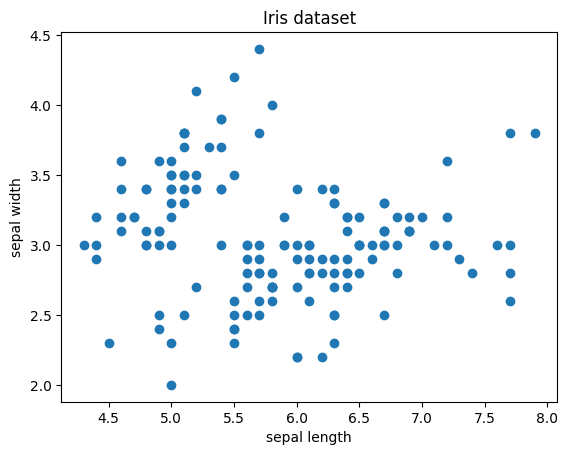

In [3]:
iris_dataset = load_iris()
data = iris_dataset.data[:, :2]

plt.scatter(data[:, 0], data[:, 1])
plt.title('Iris dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
class KMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    # def assign_clusters(self, data):
    #     distances = np.array([self.euclidean_distance(data, centroid) for centroid in self.centroids])
    #     return np.argmin(distances)
    
    def assign_clusters(self, data):
        clusters = np.zeros(data.shape[0])
        for idx, point in enumerate(data):
            distances = np.array([self.euclidean_distance(point, centroid) for centroid in self.centroids])
            clusters[idx] = np.argmin(distances)
        return clusters
    
    def update_centroids(self, data):
        for i in range(self.k):
            self.centroids[i] = np.mean(data[self.clusters == i], axis=0)
        return self.centroids
    
    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iter):
            self.clusters = self.assign_clusters(data)
            self.plot_cluster(data, i)
            new_centroids = self.update_centroids(data)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.plot_final_cluster(data)

    def plot_cluster(self, data, i):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=100, marker='x')
        plt.title(f'Iteration {i}')
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.show()
    
    def plot_final_cluster(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=100, marker='x')
        plt.title('Final')
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.show()


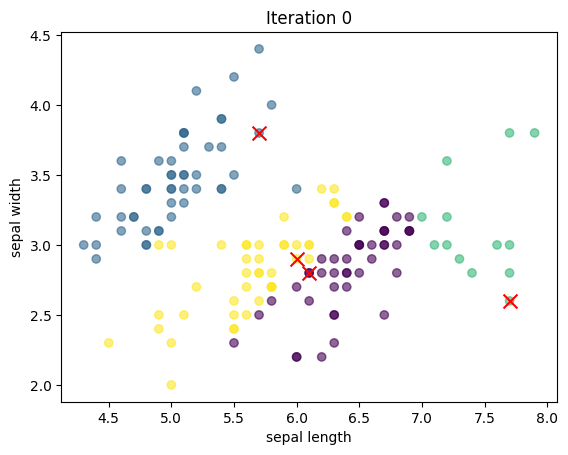

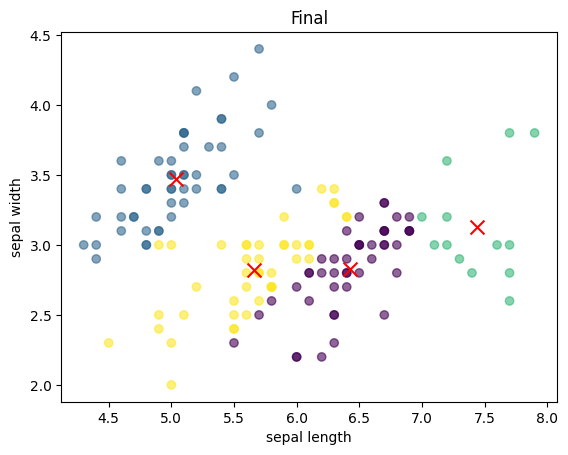

In [5]:
kmeans = KMeans(k=4)
kmeans.fit(data)